In [1]:
# import the relevant packages
from scipy.interpolate import *
from scipy import stats
from scipy.stats.mstats import winsorize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Set matplotlib inline
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
ESIdf = pd.read_csv('ESI.csv',encoding = "ISO-8859-1",index_col= [0,1])
print(ESIdf.head(3))
NESIdf = pd.read_csv('NESI.csv',encoding = "ISO-8859-1",index_col= [0,1])
print(NESIdf.head(3))

                                   cusip Ticker  Environment   Social   \
Company                   Year                                           
ALCOA INC.                2015  01381710     AA             1        4   
ALCOA CORPORATION         2016  01387210     AA            -1        3   
AMERICAN ASSETS TRUST INC 2011  24013104    AAT             0       -2   

                                Governance   SumofESG   New SUMofESG  \
Company                   Year                                         
ALCOA INC.                2015           -1         -2             4   
ALCOA CORPORATION         2016            1          4             3   
AMERICAN ASSETS TRUST INC 2011           -1          0            -3   

                                     P/B       ROA  Leverage      SG&A  \
Company                   Year                                           
ALCOA INC.                2015  0.000000  0.051927  0.298544  0.021949   
ALCOA CORPORATION         2016  0.667364  0.02

In [3]:
ESIdf.columns = ESIdf.columns.str.strip() #removewhitespaces
ESIdf_win = ESIdf.copy()

NESIdf.columns = NESIdf.columns.str.strip() #removewhitespaces
NESIdf_win = NESIdf.copy()

In [4]:
#ESI
ESIdf_win["Environment"] = winsorize(ESIdf_win["Environment"], (0.01, 0.01))
ESIdf_win["Social"] = winsorize(ESIdf_win["Social"], (0.01, 0.01))
ESIdf_win["Governance"] = winsorize(ESIdf_win["Governance"], (0.01, 0.01))
ESIdf_win["SumofESG"] = winsorize(ESIdf_win["SumofESG"], (0.01, 0.01))
ESIdf_win["P/B"] = winsorize(ESIdf_win["P/B"], (0.01, 0.01))
ESIdf_win["ROA"] = winsorize(ESIdf_win["ROA"], (0.01, 0.01))
ESIdf_win["Leverage"] = winsorize(ESIdf_win["Leverage"], (0.01, 0.01))
ESIdf_win["SG&A"] = winsorize(ESIdf_win["SG&A"], (0.01, 0.01))
ESIdf_win["ROE"] = winsorize(ESIdf_win["ROE"], (0.01, 0.01))
ESIdf_win["R&D"] = winsorize(ESIdf_win["R&D"], (0.01, 0.01))
ESIdf_win["CAPEX"] = winsorize(ESIdf_win["CAPEX"], (0.01, 0.01))
ESIdf_win["Intangible"] = winsorize(ESIdf_win["Intangible"], (0.01, 0.01))
ESIdf_win["Revenue"] = winsorize(ESIdf_win["Revenue"], (0.01, 0.01))

#NESI
NESIdf_win["Environment"] = winsorize(NESIdf_win["Environment"], (0.01, 0.01))
NESIdf_win["Social"] = winsorize(NESIdf_win["Social"], (0.01, 0.01))
NESIdf_win["Governance"] = winsorize(NESIdf_win["Governance"], (0.01, 0.01))
NESIdf_win["SumofESG"] = winsorize(NESIdf_win["SumofESG"], (0.01, 0.01))
NESIdf_win["P/B"] = winsorize(NESIdf_win["P/B"], (0.01, 0.01))
NESIdf_win["ROA"] = winsorize(NESIdf_win["ROA"], (0.01, 0.01))
NESIdf_win["Leverage"] = winsorize(NESIdf_win["Leverage"], (0.01, 0.01))
NESIdf_win["SG&A"] = winsorize(NESIdf_win["SG&A"], (0.01, 0.01))
NESIdf_win["ROE"] = winsorize(NESIdf_win["ROE"], (0.01, 0.01))
NESIdf_win["R&D"] = winsorize(NESIdf_win["R&D"], (0.01, 0.01))
NESIdf_win["CAPEX"] = winsorize(NESIdf_win["CAPEX"], (0.01, 0.01))
NESIdf_win["Intangible"] = winsorize(NESIdf_win["Intangible"], (0.01, 0.01))
NESIdf_win["Revenue"] = winsorize(NESIdf_win["Revenue"], (0.01, 0.01))

In [5]:
from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [6]:
#ESI
ESIdf_win_new = ESIdf_win.drop(['SumofESG','New SUMofESG'], axis=1)
ESIdf_win_new.describe()
#NESI
NESIdf_win_new = NESIdf_win.drop(['SumofESG','New SUMofESG'], axis=1)
NESIdf_win_new.describe()

,Environment,Social,Governance,P/B,Unnamed: 10,Net Asset,Total Asset,ROA,XRD,Leverage,...,75,78,79,80,82,83,87,88,99,Check
count,15547.000000,15547.000000,15547.000000,15547.000000,0.0,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,...,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.0
mean,0.172188,0.322956,-0.458931,3.145859,NaN,3601.451147,10525.804166,0.105922,225.588422,0.555184,...,0.004567,0.004567,0.011449,0.018653,0.001865,0.001286,0.016145,0.000129,0.005017,1.0
std,0.965507,2.055474,0.776377,3.757848,NaN,9325.815010,33448.505341,0.082354,904.841443,0.194405,...,0.067426,0.067426,0.106390,0.135301,0.043150,0.035845,0.126036,0.011342,0.070655,0.0
min,-3.000000,-4.000000,-3.000000,0.000000,NaN,-2749.183000,133.300000,-0.135186,0.000000,0.105366,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,-1.000000,-1.000000,1.331721,NaN,545.147000,1182.479000,0.058716,0.000000,0.424950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,2.165917,NaN,1116.846000,2626.943000,0.095167,0.000000,0.567329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,1.000000,0.000000,3.582788,NaN,2765.950000,7732.100000,0.147043,88.250000,0.694128,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,4.000000,7.000000,1.000000,26.463318,NaN,147786.000000,797769.000000,0.373321,16085.000000,0.971020,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [7]:
#Convert SIC Dummy column to dummy variables
#ESI
ESIdf_win_dummy = pd.get_dummies(prefix='SIC', data=ESIdf_win['Industry Code'])
ESIdf_win_dummy
#NESI
NESIdf_win_dummy = pd.get_dummies(prefix='SIC', data=NESIdf_win['Industry Code'])
NESIdf_win_dummy

SIC_15  SIC_16  SIC_17  SIC_20  SIC_21  \
Company                    Year                                           
Agilent Technologies, Inc. 2000       0       0       0       0       0   
                           2001       0       0       0       0       0   
                           2002       0       0       0       0       0   
                           2003       0       0       0       0       0   
                           2004       0       0       0       0       0   
...                                 ...     ...     ...     ...     ...   
Wyeth                      2008       0       0       0       0       0   
ZOETIS INC.                2013       0       0       0       0       0   
                           2014       0       0       0       0       0   
                           2015       0       0       0       0       0   
                           2016       0       0       0       0       0   

                                 SIC_22  SIC_23  SIC_24  SIC_25  SIC_27  ...  \
Company                    Year                                          ...   
Agilent Technologies, Inc. 2000       0       0       0       0       0  ...   
                           2001       0       0       0       0       0  ...   
                           2002       0       0       0       0       0  ...   
                           2003       0       0       0       0       0  ...   
                           2004       0       0       0       0       0  ...   
...                                 ...     ...     ...     ...     ...  ...   
Wyeth                      2008       0       0       0       0       0  ...   
ZOETIS INC.                2013       0       0       0       0       0  ...   
                           2014       0       0       0       0       0  ...   
                           2015       0       0       0       0       0  ...   
                           2016       0       0       0       0       0  ...   

                                 SIC_73  SIC_75  SIC_78  SIC_79  SIC_80  \
Company                    Year                                           
Agilent Technologies, Inc. 2000       0       0       0       0       0   
                           2001       0       0       0       0       0   
                           2002       0       0       0       0       0   
                           2003       0       0       0       0       0   
                           2004       0       0       0       0       0   
...                                 ...     ...     ...     ...     ...   
Wyeth                      2008       0       0       0       0       0   
ZOETIS INC.                2013       0       0       0       0       0   
                           2014       0       0       0       0       0   
                           2015       0       0       0       0       0   
                           2016       0       0       0       0       0   

                                 SIC_82  SIC_83  SIC_87  SIC_88  SIC_99  
Company                    Year                                          
Agilent Technologies, Inc. 2000       0       0       0       0       0  
                           2001       0       0       0       0       0  
                           2002       0       0       0       0       0  
                           2003       0       0       0       0       0  
                           2004       0       0       0       0       0  
...                                 ...     ...     ...     ...     ...  
Wyeth                      2008       0       0       0       0       0  
ZOETIS INC.                2013       0       0       0       0       0  
                           2014       0       0       0       0       0  
                           2015       0       0       0       0       0  
                           2016       0       0       0       0       0  

[15547 rows x 53 columns]

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue
Environment,1.000000,0.245154,0.090798,0.004706,0.570141,0.046683,-0.082495,0.123603,0.011228,-0.027153,-0.026524,-0.146986,0.085432,-0.131516
Social,0.245154,1.000000,0.058139,0.021979,0.875579,0.067417,0.009484,0.092988,0.079157,0.051464,0.062399,-0.031699,0.041764,-0.038078
Governance,0.090798,0.058139,1.000000,-0.018565,0.371443,-0.015949,-0.147453,0.152538,-0.088335,-0.100835,-0.103387,-0.065947,-0.098665,-0.164521
SumofESG,0.004706,0.021979,-0.018565,1.000000,0.014589,-0.004516,-0.003890,-0.009579,0.021617,0.009276,0.019037,0.001797,0.011952,-0.009030
New SUMofESG,0.570141,0.875579,0.371443,0.014589,1.000000,0.072150,-0.061159,0.155319,0.050112,0.008307,0.014581,-0.092345,0.040979,-0.120068
P/B,0.046683,0.067417,-0.015949,-0.004516,0.072150,1.000000,0.396411,-0.156882,0.360229,0.506100,0.263671,0.163577,0.186589,0.255924
ROA,-0.082495,0.009484,-0.147453,-0.003890,-0.061159,0.396411,1.000000,-0.545664,0.527917,0.720254,0.431466,0.391374,0.322555,0.612913
Leverage,0.123603,0.092988,0.152538,-0.009579,0.155319,-0.156882,-0.545664,1.000000,-0.432496,-0.187285,-0.353058,-0.533002,-0.298348,-0.555074
SG&A,0.011228,0.079157,-0.088335,0.021617,0.050112,0.360229,0.527917,-0.432496,1.000000,0.476198,0.627969,0.197999,0.405642,0.616416
ROE,-0.027153,0.051464,-0.100835,0.009276,0.008307,0.506100,0.720254,-0.187285,0.476198,1.000000,0.373530,0.150234,0.231411,0.435207


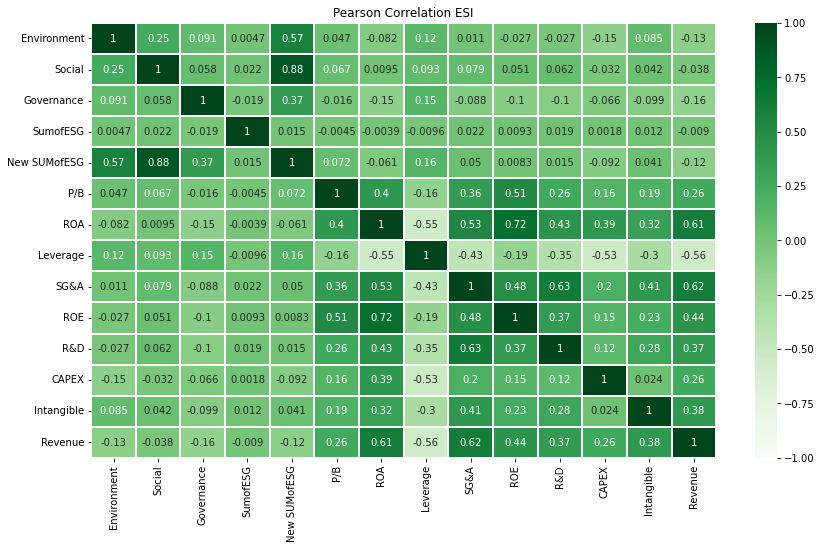

In [8]:
#ESI
# Drop SIC code and Industry code. 
ESIdf_win_new = ESIdf_win.drop(['SIC','Industry Code'], axis=1)
##correlation heatmap

#Finding the correlation between variables
pearsonCorr = ESIdf_win_new.corr(method='pearson')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation ESI")
pearsonCorr.head(12)

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue
Environment,1.000000,0.245154,0.090798,0.004706,0.570141,0.046683,-0.082495,0.123603,0.011228,-0.027153,-0.026524,-0.146986,0.085432,-0.131516
Social,0.245154,1.000000,0.058139,0.021979,0.875579,0.067417,0.009484,0.092988,0.079157,0.051464,0.062399,-0.031699,0.041764,-0.038078
Governance,0.090798,0.058139,1.000000,-0.018565,0.371443,-0.015949,-0.147453,0.152538,-0.088335,-0.100835,-0.103387,-0.065947,-0.098665,-0.164521
SumofESG,0.004706,0.021979,-0.018565,1.000000,0.014589,-0.004516,-0.003890,-0.009579,0.021617,0.009276,0.019037,0.001797,0.011952,-0.009030
New SUMofESG,0.570141,0.875579,0.371443,0.014589,1.000000,0.072150,-0.061159,0.155319,0.050112,0.008307,0.014581,-0.092345,0.040979,-0.120068
P/B,0.046683,0.067417,-0.015949,-0.004516,0.072150,1.000000,0.396411,-0.156882,0.360229,0.506100,0.263671,0.163577,0.186589,0.255924
ROA,-0.082495,0.009484,-0.147453,-0.003890,-0.061159,0.396411,1.000000,-0.545664,0.527917,0.720254,0.431466,0.391374,0.322555,0.612913
Leverage,0.123603,0.092988,0.152538,-0.009579,0.155319,-0.156882,-0.545664,1.000000,-0.432496,-0.187285,-0.353058,-0.533002,-0.298348,-0.555074
SG&A,0.011228,0.079157,-0.088335,0.021617,0.050112,0.360229,0.527917,-0.432496,1.000000,0.476198,0.627969,0.197999,0.405642,0.616416
ROE,-0.027153,0.051464,-0.100835,0.009276,0.008307,0.506100,0.720254,-0.187285,0.476198,1.000000,0.373530,0.150234,0.231411,0.435207


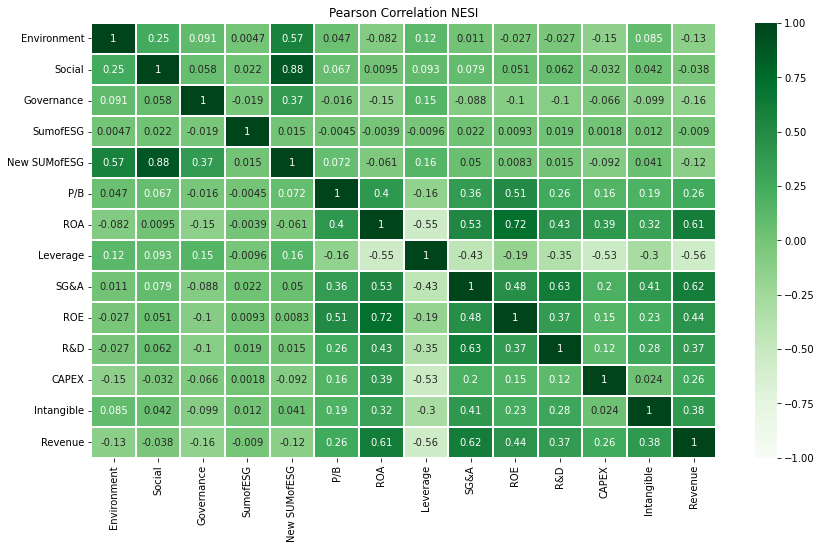

In [9]:
#NESI
# Drop SIC code and Industry code. 
NESIdf_win_new = NESIdf_win.drop(['SIC','Industry Code'], axis=1)
##correlation heatmap

#Finding the correlation between variables
pearsonCorr2 = NESIdf_win_new.corr(method='pearson')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation NESI")
pearsonCorr.head(12)

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue
Environment,1.000000,0.221104,0.070338,-0.000929,0.465398,-0.036887,-0.084282,0.109554,-0.125325,-0.084365,-0.059930,-0.166549,0.078819,-0.117687
Social,0.221104,1.000000,0.081882,0.015939,0.873712,0.027975,-0.043706,0.114041,-0.009815,0.055319,-0.001662,-0.026417,0.060227,-0.080933
Governance,0.070338,0.081882,1.000000,-0.019721,0.401362,0.035172,-0.165184,0.151322,-0.033242,-0.084734,-0.128258,-0.079861,-0.053835,-0.212039
SumofESG,-0.000929,0.015939,-0.019721,1.000000,0.007802,-0.021822,-0.001754,-0.005211,-0.023704,-0.005341,0.020260,-0.008922,-0.019325,-0.001892
New SUMofESG,0.465398,0.873712,0.401362,0.007802,1.000000,0.037358,-0.115880,0.185195,-0.053381,0.002924,-0.052657,-0.094596,0.053314,-0.172360
P/B,-0.036887,0.027975,0.035172,-0.021822,0.037358,1.000000,0.244435,-0.088439,0.376842,0.396554,0.228038,0.264922,0.160117,0.142816
ROA,-0.084282,-0.043706,-0.165184,-0.001754,-0.115880,0.244435,1.000000,-0.612509,0.364019,0.709152,0.451695,0.438163,0.244504,0.719391
Leverage,0.109554,0.114041,0.151322,-0.005211,0.185195,-0.088439,-0.612509,1.000000,-0.402152,-0.106725,-0.435050,-0.571159,-0.160542,-0.738973
SG&A,-0.125325,-0.009815,-0.033242,-0.023704,-0.053381,0.376842,0.364019,-0.402152,1.000000,0.414355,0.544951,0.629115,0.362049,0.446134
ROE,-0.084365,0.055319,-0.084734,-0.005341,0.002924,0.396554,0.709152,-0.106725,0.414355,1.000000,0.403778,0.384516,0.235927,0.389526


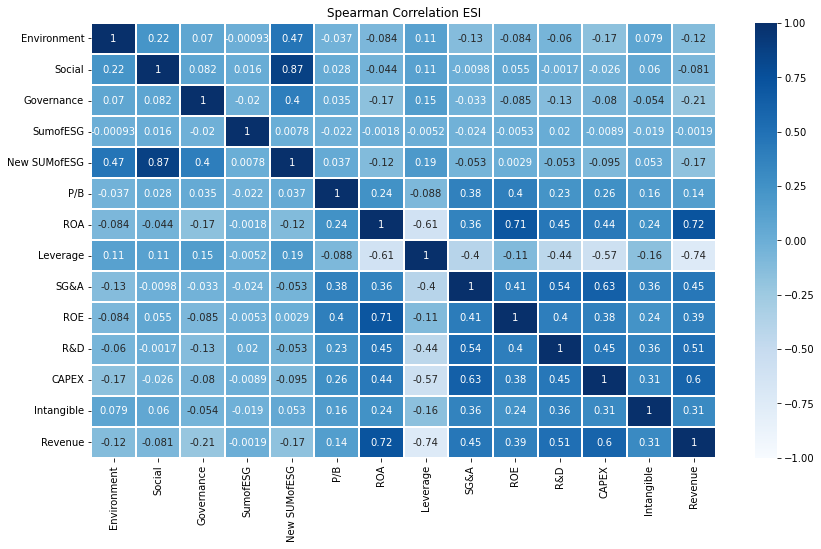

In [10]:
spearmanCorr = ESIdf_win_new.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation ESI")
spearmanCorr.head(12)

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,R&D,CAPEX,Intangible,Revenue
Environment,1.000000,0.221104,0.070338,-0.000929,0.465398,-0.036887,-0.084282,0.109554,-0.125325,-0.084365,-0.059930,-0.166549,0.078819,-0.117687
Social,0.221104,1.000000,0.081882,0.015939,0.873712,0.027975,-0.043706,0.114041,-0.009815,0.055319,-0.001662,-0.026417,0.060227,-0.080933
Governance,0.070338,0.081882,1.000000,-0.019721,0.401362,0.035172,-0.165184,0.151322,-0.033242,-0.084734,-0.128258,-0.079861,-0.053835,-0.212039
SumofESG,-0.000929,0.015939,-0.019721,1.000000,0.007802,-0.021822,-0.001754,-0.005211,-0.023704,-0.005341,0.020260,-0.008922,-0.019325,-0.001892
New SUMofESG,0.465398,0.873712,0.401362,0.007802,1.000000,0.037358,-0.115880,0.185195,-0.053381,0.002924,-0.052657,-0.094596,0.053314,-0.172360
P/B,-0.036887,0.027975,0.035172,-0.021822,0.037358,1.000000,0.244435,-0.088439,0.376842,0.396554,0.228038,0.264922,0.160117,0.142816
ROA,-0.084282,-0.043706,-0.165184,-0.001754,-0.115880,0.244435,1.000000,-0.612509,0.364019,0.709152,0.451695,0.438163,0.244504,0.719391
Leverage,0.109554,0.114041,0.151322,-0.005211,0.185195,-0.088439,-0.612509,1.000000,-0.402152,-0.106725,-0.435050,-0.571159,-0.160542,-0.738973
SG&A,-0.125325,-0.009815,-0.033242,-0.023704,-0.053381,0.376842,0.364019,-0.402152,1.000000,0.414355,0.544951,0.629115,0.362049,0.446134
ROE,-0.084365,0.055319,-0.084734,-0.005341,0.002924,0.396554,0.709152,-0.106725,0.414355,1.000000,0.403778,0.384516,0.235927,0.389526


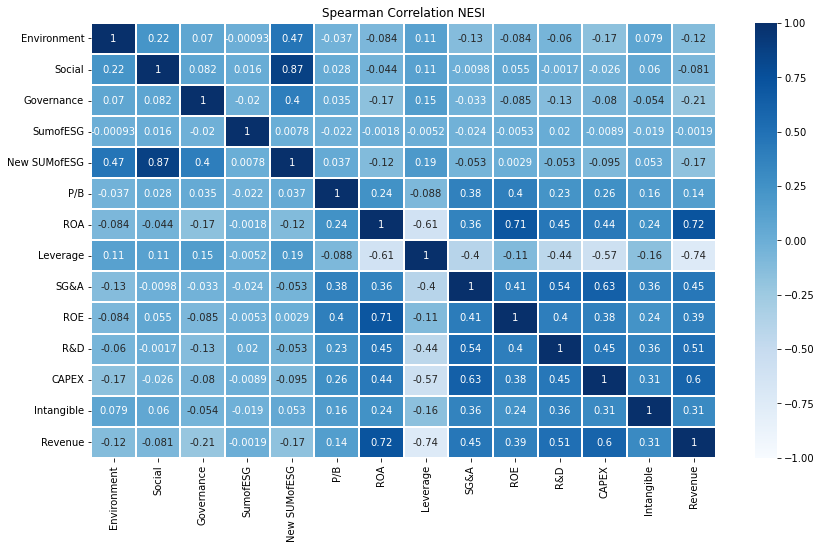

In [11]:
spearmanCorr2 = NESIdf_win_new.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation NESI")
spearmanCorr.head(12)

In [12]:
ESIdf_win_dummy = ESIdf_win_dummy.astype(float)
#joining SIC dummy variables to existing dataframe 

ESInew_df = pd.concat([ESIdf_win_new, ESIdf_win_dummy], axis=1)
ESInew_df

cusip Ticker  Environment  \
Company                               Year                                 
ALCOA INC.                            2015  01381710     AA            1   
ALCOA CORPORATION                     2016  01387210     AA           -1   
AMERICAN ASSETS TRUST INC             2011  24013104    AAT            0   
American Assets Trust, Inc.           2012  24013104    AAT            0   
AMERICAN ASSETS TRUST, INC.           2013  02401310    AAT            1   
...                                              ...    ...          ...   
Zenith National Insurance Corporation 2005  98939010    ZNT            0   
                                      2006  98939010    ZNT            0   
                                      2007  98939010    ZNT            0   
                                      2008  98939010    ZNT            0   
                                      2009  98939010    ZNT            0   

                                            Social  Governance  SumofESG  \
Company                               Year                                 
ALCOA INC.                            2015       4          -1        -2   
ALCOA CORPORATION                     2016       3           1         4   
AMERICAN ASSETS TRUST INC             2011      -2          -1         0   
American Assets Trust, Inc.           2012      -1           0         0   
AMERICAN ASSETS TRUST, INC.           2013      -2           0         0   
...                                            ...         ...       ...   
Zenith National Insurance Corporation 2005       0          -1         0   
                                      2006       0          -1        -2   
                                      2007       1          -1        -2   
                                      2008       1          -1        -1   
                                      2009       1          -1        -3   

                                            New SUMofESG       P/B       ROA  \
Company                               Year                                     
ALCOA INC.                            2015             4  0.000000  0.051927   
ALCOA CORPORATION                     2016             3  0.667364  0.023762   
AMERICAN ASSETS TRUST INC             2011            -3  1.185349  0.026768   
American Assets Trust, Inc.           2012            -1  0.000000  0.021088   
AMERICAN ASSETS TRUST, INC.           2013            -1  1.854594  0.022228   
...                                                  ...       ...       ...   
Zenith National Insurance Corporation 2005            -1  2.410123  0.051977   
                                      2006            -1  0.000000  0.074718   
                                      2007             0  0.000000  0.066507   
                                      2008             0  0.000000  0.027470   
                                      2009             0  1.053387  0.012352   

                                            Leverage  ...  Intangible  \
Company                               Year            ...               
ALCOA INC.                            2015  0.298544  ...    0.010974   
ALCOA CORPORATION                     2016  0.540231  ...    0.017669   
AMERICAN ASSETS TRUST INC             2011  1.204662  ...    0.041747   
American Assets Trust, Inc.           2012  1.249580  ...    0.027351   
AMERICAN ASSETS TRUST, INC.           2013  1.250642  ...    0.017831   
...                                              ...  ...         ...   
Zenith National Insurance Corporation 2005  1.475395  ...    0.008691   
                                      2006  1.320179  ...    0.007722   
                                      2007  1.225846  ...    0.007583   
                                      2008  1.188001  ...    0.007568   
                                      2009  1.131399  ...    0.008325   

                                             Revenue  SIC_10  SIC_12  SIC_13  

In [13]:
NESIdf_win_dummy = NESIdf_win_dummy.astype(float)
#joining SIC dummy variables to existing dataframe 

NESInew_df = pd.concat([NESIdf_win_new, NESIdf_win_dummy], axis=1)
NESInew_df

cusip Ticker  Environment  Social  \
Company                    Year                                         
Agilent Technologies, Inc. 2000  00846U10      A            0       1   
                           2001  00846U10      A            0       1   
                           2002  00846U10      A            0       7   
                           2003  00846U10      A            0       2   
                           2004  00846U10      A            0       3   
...                                   ...    ...          ...     ...   
Wyeth                      2008  98302410    WYE            1       0   
ZOETIS INC.                2013  98978V10    ZTS            0      -1   
                           2014  98978V10    ZTS            1       1   
                           2015  98978V10    ZTS            2       0   
                           2016  98978V10    ZTS            1       1   

                                 Governance  SumofESG  New SUMofESG  \
Company                    Year                                       
Agilent Technologies, Inc. 2000          -2         5            -1   
                           2001          -2        -4            -1   
                           2002           0         0             7   
                           2003          -1        -2             1   
                           2004          -1        -1             2   
...                                     ...       ...           ...   
Wyeth                      2008           0        -3             1   
ZOETIS INC.                2013           0        -4            -1   
                           2014           1        -3             3   
                           2015           1        -3             3   
                           2016           0         2             2   

                                       P/B  Unnamed: 10  Net Asset  ...  \
Company                    Year                                     ...   
Agilent Technologies, Inc. 2000   3.993307          NaN   5265.000  ...   
                           2001   1.814184          NaN   5659.000  ...   
                           2002   1.387778          NaN   4627.000  ...   
                           2003   4.200397          NaN   2824.000  ...   
                           2004   3.392889          NaN   3597.000  ...   
...                                    ...          ...        ...  ...   
Wyeth                      2008   2.604934          NaN  19173.842  ...   
ZOETIS INC.                2013  16.990644          NaN    962.000  ...   
                           2014  16.134737          NaN   1337.000  ...   
                           2015  21.847303          NaN   1091.000  ...   
                           2016  17.600086          NaN   1499.000  ...   

                                 SIC_73  SIC_75  SIC_78  SIC_79  SIC_80  \
Company                    Year                                           
Agilent Technologies, Inc. 2000     0.0     0.0     0.0     0.0     0.0   
                           2001     0.0     0.0     0.0     0.0     0.0   
                           2002     0.0     0.0     0.0     0.0     0.0   
                           2003     0.0     0.0     0.0     0.0     0.0   
                           2004     0.0     0.0     0.0     0.0     0.0   
...                                 ...     ...     ...     ...     ...   
Wyeth                      2008     0.0     0.0     0.0     0.0     0.0   
ZOETIS INC.                2013     0.0     0.0     0.0     0.0     0.0   
                           2014     0.0     0.0     0.0     0.0     0.0   
                           2015     0.0     0.0     0.0     0.0     0.0   
                           2016     0.0     0.0     0.0     0.0     0.0   

                                 SIC_82  SIC_83  SIC_87  SIC_88  SIC_99  
Company                    Year                                          
Agilent Technologies, Inc. 2000     0.0     0.0     0.0     0.

In [14]:
NESInew_df.columns.tolist()

['cusip',
 'Ticker',
 'Environment',
 'Social',
 'Governance',
 'SumofESG',
 'New SUMofESG',
 'P/B',
 'Unnamed: 10',
 'Net Asset',
 'Total Asset',
 'ROA',
 'XRD',
 'Leverage',
 'XSGA',
 'Intangible Asset',
 'Total Asset at beginning of the year',
 'Year for Asset at beginning of the year',
 'Asset at beginning of the year',
 'OIAPD',
 'SG&A',
 'ROE',
 'R&D',
 'Capital Expenditure',
 'CAPEX',
 'Intangible',
 'Market Value',
 'Revenue',
 'Revenue.1',
 '10',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '70',
 '71',
 '72',
 '73',
 '75',
 '78',
 '79',
 '80',
 '82',
 '83',
 '87',
 '88',
 '99',
 'Check',
 'SIC_15',
 'SIC_16',
 'SIC_17',
 'SIC_20',
 'SIC_21',
 'SIC_22',
 'SIC_23',
 'SIC_24',
 'SIC_25',
 'SIC_27',
 'SIC_28',
 'S

In [15]:
ESInew_df.columns.tolist()

['cusip',
 'Ticker',
 'Environment',
 'Social',
 'Governance',
 'SumofESG',
 'New SUMofESG',
 'P/B',
 'ROA',
 'Leverage',
 'SG&A',
 'ROE',
 'R&D',
 'CAPEX',
 'Intangible',
 'Revenue',
 'SIC_10',
 'SIC_12',
 'SIC_13',
 'SIC_14',
 'SIC_26',
 'SIC_28',
 'SIC_29',
 'SIC_33']

In [16]:
##winsorized data 

ESInew_df.describe()

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,ROA,Leverage,SG&A,ROE,...,Intangible,Revenue,SIC_10,SIC_12,SIC_13,SIC_14,SIC_26,SIC_28,SIC_29,SIC_33
count,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,...,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000,9715.000000
mean,0.022851,0.173855,-0.128873,-0.013690,0.078744,1.562715,0.045041,1.235308,0.039829,0.135364,...,0.067286,0.437874,0.018528,0.532681,0.267319,0.013999,0.032527,0.086773,0.013690,0.034483
std,0.790158,1.825160,0.701087,2.381799,2.439694,1.688380,0.063845,0.546047,0.080968,0.171172,...,0.126265,0.566930,0.134858,0.498956,0.442583,0.117492,0.177404,0.281517,0.116207,0.182475
min,-3.000000,-4.000000,-2.000000,-6.000000,-11.000000,0.000000,-0.094137,0.204405,0.000000,-0.379456,...,0.000000,0.030363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.273873,0.010307,0.676154,0.000000,0.055260,...,0.000398,0.071412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.290533,0.019486,1.329556,0.009557,0.099562,...,0.015633,0.175489,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,2.112940,0.058939,1.776895,0.032564,0.171254,...,0.059305,0.609142,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,6.000000,1.000000,8.000000,17.000000,10.594544,0.305934,1.914029,0.492503,1.036064,...,0.669753,2.981675,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
NESInew_df.describe()

,Environment,Social,Governance,SumofESG,New SUMofESG,P/B,Unnamed: 10,Net Asset,Total Asset,ROA,...,SIC_73,SIC_75,SIC_78,SIC_79,SIC_80,SIC_82,SIC_83,SIC_87,SIC_88,SIC_99
count,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,0.0,15547.000000,15547.000000,15547.000000,...,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000
mean,0.172188,0.322956,-0.458931,-0.045025,0.044639,3.145859,NaN,3601.451147,10525.804166,0.105922,...,0.112176,0.004567,0.004567,0.011449,0.018653,0.001865,0.001286,0.016145,0.000129,0.005017
std,0.965507,2.055474,0.776377,2.364894,2.839425,3.757848,NaN,9325.815010,33448.505341,0.082354,...,0.315593,0.067426,0.067426,0.106390,0.135301,0.043150,0.035845,0.126036,0.011342,0.070655
min,-3.000000,-4.000000,-3.000000,-6.000000,-12.000000,0.000000,NaN,-2749.183000,133.300000,-0.135186,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,1.331721,NaN,545.147000,1182.479000,0.058716,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.165917,NaN,1116.846000,2626.943000,0.095167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,3.582788,NaN,2765.950000,7732.100000,0.147043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,7.000000,1.000000,8.000000,20.000000,26.463318,NaN,147786.000000,797769.000000,0.373321,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# ESI with no Dummy 

## original regression done on all variables as per normal

exog_vars = ['Environment','Social','Governance','SG&A','ROE','R&D','Leverage','Intangible']
exog = sm.add_constant(ESInew_df[exog_vars])
endog = ESInew_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.1726
Estimator:              RandomEffects   R-squared (Between):              0.3529
No. Observations:                9715   R-squared (Within):               0.0618
Date:                Fri, Aug 12 2022   R-squared (Overall):              0.2739
Time:                        15:09:00   Log-likelihood                -1.535e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      253.10
Entities:                        2192   P-value                           0.0000
Avg Obs:                       4.4320   Distribution:                  F(8,9706)
Min Obs:                       1.0000                                           
Max Obs:                       23.000   F-statistic (robust):             233.07
                            

In [19]:
# ESI with with Dummy 
exog_vars = ['Environment','Social','Governance','SG&A','ROE','R&D','Leverage','Intangible','SIC_10','SIC_12','SIC_13','SIC_14','SIC_26','SIC_28','SIC_29','SIC_33']
exog = sm.add_constant(ESInew_df[exog_vars])
endog = ESInew_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.1756
Estimator:              RandomEffects   R-squared (Between):              0.3513
No. Observations:                9715   R-squared (Within):               0.0655
Date:                Fri, Aug 12 2022   R-squared (Overall):              0.2737
Time:                        15:09:00   Log-likelihood                -1.535e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      129.14
Entities:                        2192   P-value                           0.0000
Avg Obs:                       4.4320   Distribution:                 F(16,9698)
Min Obs:                       1.0000                                           
Max Obs:                       23.000   F-statistic (robust):             119.67
                            

C:\Users\Kayva\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
C:\Users\Kayva\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
C:\Users\Kayva\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
C:\Users\Kayva\anaconda3\lib\site-packages\linearmodels\panel\results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


In [20]:
# NESI with Dummy 
## original regression done on all variables as per normal

exog_vars = ['Environment','Social','Governance','SG&A','ROE','R&D','Leverage','Intangible','SIC_15',
 'SIC_16', 'SIC_17', 'SIC_20', 'SIC_21', 'SIC_22', 'SIC_23', 'SIC_24', 'SIC_25', 'SIC_27', 'SIC_28', 'SIC_29', 'SIC_30', 'SIC_31', 'SIC_32', 'SIC_34', 'SIC_35', 'SIC_36', 'SIC_37', 'SIC_38', 'SIC_39', 'SIC_40', 'SIC_41', 'SIC_42', 'SIC_44', 'SIC_45', 'SIC_46', 'SIC_47', 'SIC_48', 'SIC_49', 'SIC_50', 'SIC_51', 'SIC_52', 'SIC_53', 'SIC_54', 'SIC_55', 'SIC_56', 'SIC_57', 'SIC_58', 'SIC_59', 'SIC_70', 'SIC_71', 'SIC_72', 'SIC_73', 'SIC_75', 'SIC_78', 'SIC_79', 'SIC_80', 'SIC_82', 'SIC_83', 'SIC_87', 'SIC_88','SIC_99']
exog = sm.add_constant(NESInew_df[exog_vars])
endog = NESInew_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
NESIwD = model_re.fit() 
#print results
print(NESIwD)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.4072
Estimator:              RandomEffects   R-squared (Between):              0.5368
No. Observations:               15547   R-squared (Within):               0.3200
Date:                Fri, Aug 12 2022   R-squared (Overall):              0.4580
Time:                        15:09:01   Log-likelihood                -3.293e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      174.39
Entities:                        3392   P-value                           0.0000
Avg Obs:                       4.5834   Distribution:                F(61,15485)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             149.78
                            

In [21]:
# NESI with no Dummy 
exog_vars = ['Environment','Social','Governance','SG&A','ROE','R&D','Leverage','Intangible']
exog = sm.add_constant(NESInew_df[exog_vars])
endog = NESInew_df['P/B']
#random effects model
model_re = RandomEffects(endog, exog, check_rank=False) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    P/B   R-squared:                        0.3928
Estimator:              RandomEffects   R-squared (Between):              0.5005
No. Observations:               15547   R-squared (Within):               0.3181
Date:                Fri, Aug 12 2022   R-squared (Overall):              0.4321
Time:                        15:09:01   Log-likelihood                -3.298e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1256.5
Entities:                        3392   P-value                           0.0000
Avg Obs:                       4.5834   Distribution:                 F(8,15538)
Min Obs:                       1.0000                                           
Max Obs:                       26.000   F-statistic (robust):             1132.7
                            